# **Ramchandra Rane**
# **PGDM** **(Business Analytics)**
#              **Heart Failure Prediction: Machine Learning to the Rescue!**


# **Importing Libraries**

In [ ]:
import sys
!{sys.executable} -m pip install dmba

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 78.7 MB/s eta 0:00:00


In [ ]:
pip install -U scikit-learn scipy matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 79.0 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from dmba import classificationSummary, adjusted_r2_score

Colab environment detected.


# **Data Pre-processing**

In [ ]:
heart = pd.read_csv('/content/heart.csv')
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
print(heart.dtypes)

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


In [ ]:
print(len(heart))

918


In [ ]:
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
heart.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


# **Exploratory Data Analysis**

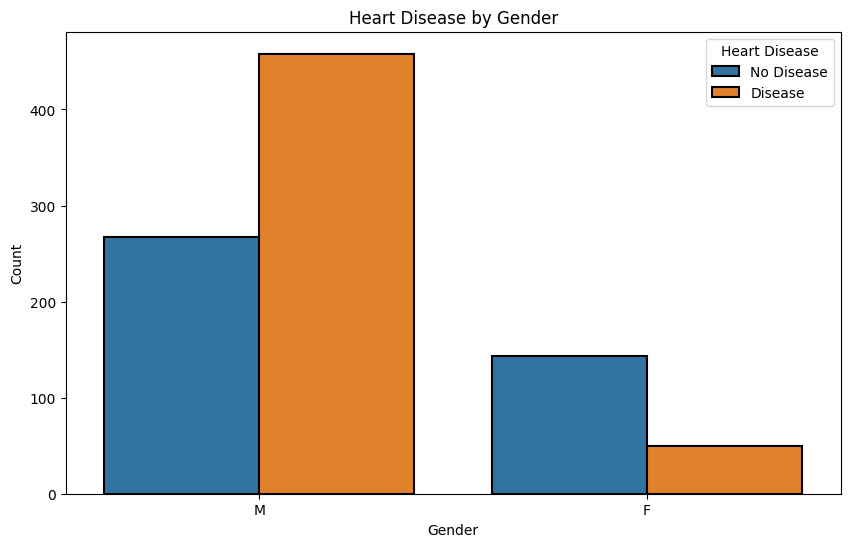

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='Sex', hue ='HeartDisease',data=heart, edgecolor = 'black',linewidth = 1.5)
plt.title("Heart Disease by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(['No Disease','Disease'],title="Heart Disease")
plt.show()

**Inference** - The above bar garph shows the count of male and female suffering from heart disease.

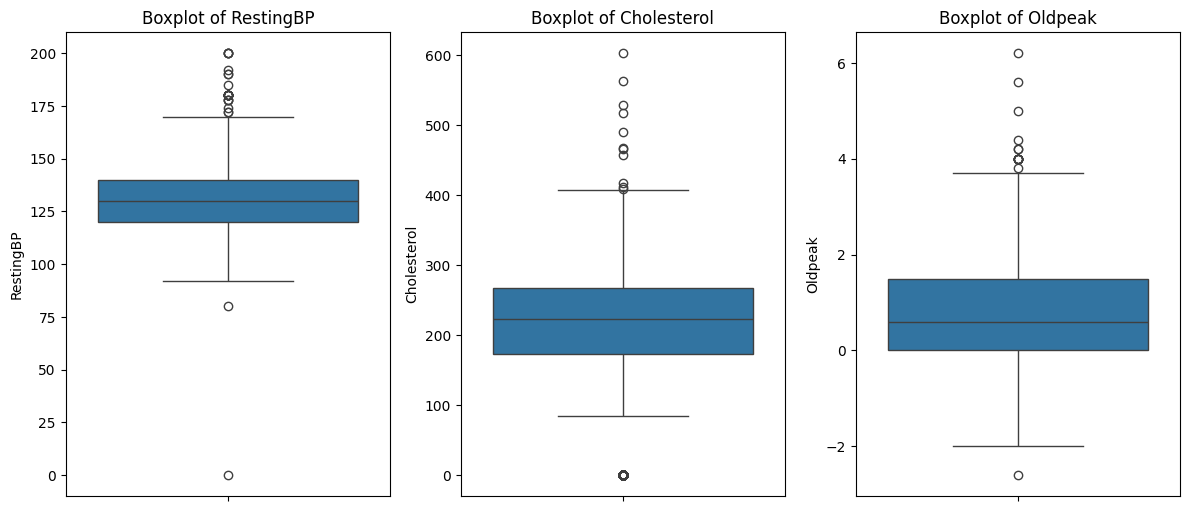

In [ ]:
# assigning a term for numeric variables
continuous_features = ['RestingBP', 'Cholesterol', 'Oldpeak']
plt.figure(figsize=(12, 10))
for i, col in enumerate(continuous_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=heart[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

**Inference** - The above box plot shows outliers present in continuos/numeric variables, hence easier decision making can be done.

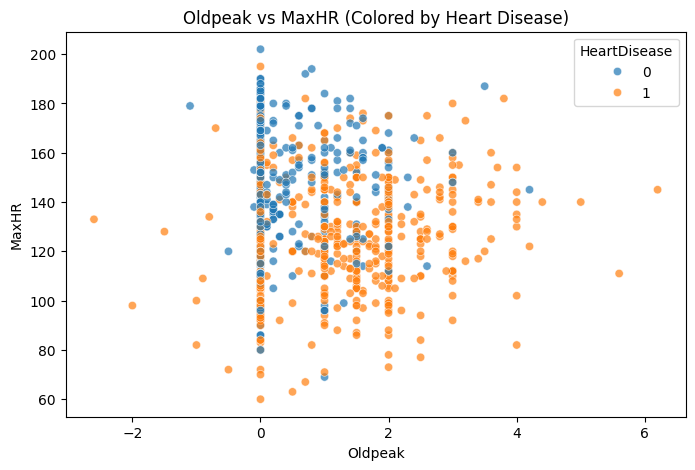

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=heart, x="Oldpeak", y="MaxHR", hue="HeartDisease", alpha=0.7)
plt.title("Oldpeak vs MaxHR (Colored by Heart Disease)")
plt.show()

**Inference** - The above plot indicates the relationship between Oldpeak and Max Heart Rate indicating people having disease have higher depression in ST curve which ultimately leads to decrease in Heart Rate or having Heart Dysfunction.

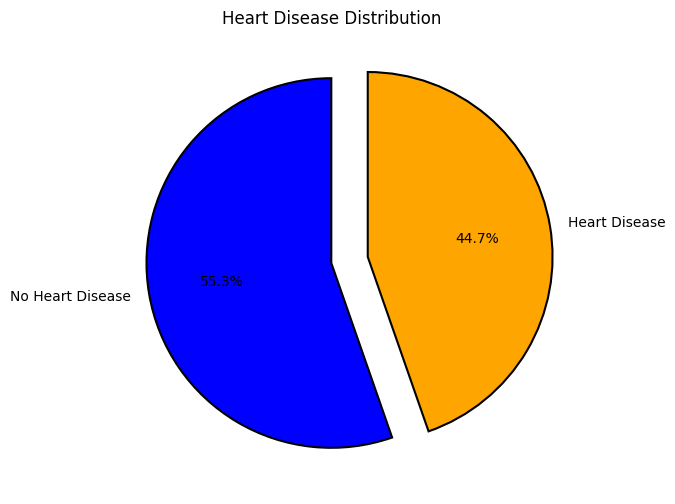

In [ ]:
# Counting the occurrences of each category in HeartDisease column
heart_disease_counts = heart['HeartDisease'].value_counts()

# Creating a pie chart
plt.figure(figsize=(6, 6))
plt.pie(heart_disease_counts, labels=['No Heart Disease', 'Heart Disease'], autopct='%1.1f%%',
        colors=['blue', 'orange'], startangle=90, explode=[0, 0.2],
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})

# Title and display
plt.title('Heart Disease Distribution')
plt.show()

**Inference** - The above piechart indicates that the data is well distributed and balanced.

# **Defining the variables**

In [ ]:
predictors_df = heart[['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS',
                       'RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope']]
response_df = heart['HeartDisease']

In [ ]:
predictors_df_dummies = pd.get_dummies(data=predictors_df, columns=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'], drop_first= True)

In [ ]:
predictors_df_dummies.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.055750,-0.218165,-0.011335,0.032042,-0.230566,0.136798,0.215793,0.185568,-0.258067
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.005133,-0.046153,-0.041348,0.049855,-0.116851,0.090447,0.155101,0.099207,-0.096146
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.200092,0.150954,-0.006634,0.017365,-0.038470,-0.133106,-0.034166,-0.050953,0.094027
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.120076,-0.140514,-0.039249,0.026885,-0.093028,0.127110,0.060451,0.107006,-0.161730
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.189186,0.253735,0.134580,0.100025,0.023801,-0.157879,-0.370425,-0.342581,0.383397
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.105734,-0.262124,-0.106212,0.032231,-0.116719,0.055958,0.408752,0.283295,-0.450577
Sex_M,0.055750,0.005133,-0.200092,0.120076,-0.189186,0.105734,1.000000,-0.161522,-0.066486,-0.004031,-0.010634,0.063715,0.190664,0.116077,-0.150942
ChestPainType_ATA,-0.218165,-0.046153,0.150954,-0.140514,0.253735,-0.262124,-0.161522,1.000000,-0.256767,-0.110679,0.107941,-0.046111,-0.300365,-0.304667,0.357588
ChestPainType_NAP,-0.011335,-0.041348,-0.006634,-0.039249,0.134580,-0.106212,-0.066486,-0.256767,1.000000,-0.122381,0.005010,-0.042236,-0.166030,-0.072031,0.093583
ChestPainType_TA,0.032042,0.049855,0.017365,0.026885,0.100025,0.032231,-0.004031,-0.110679,-0.122381,1.000000,-0.057719,-0.011611,-0.128105,-0.010486,0.002087


# **Performing Correlation Analysis**
This gives correlation between the variables which helps identifying multicollinearity.

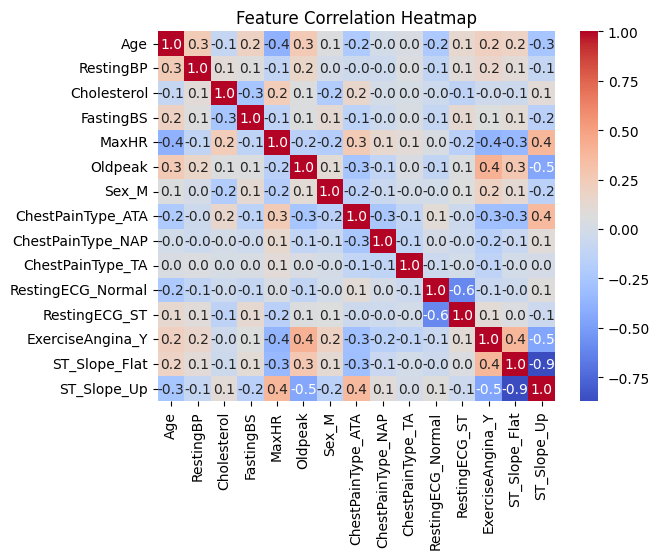

In [ ]:
plt.Figure(figsize=(10,6))
sns.heatmap(predictors_df_dummies.corr(), annot=True, cmap='coolwarm', fmt='.1f')
plt.title("Feature Correlation Heatmap")
plt.show()

# **Normalizing Predictors**

In [ ]:
z_score_norm = preprocessing.StandardScaler()
predictor_df_normalized = z_score_norm.fit_transform(predictors_df_dummies)
predictor_df_normalized = pd.DataFrame(predictor_df_normalized, columns= predictors_df_dummies.columns)
predictor_df_normalized.head(10)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.410909,0.825070,-0.551341,1.382928,-0.832432,0.515952,2.075177,-0.532838,-0.229679,0.814275,-0.490449,-0.823556,-1.002181,1.150674
1,-0.478484,1.491752,-0.171961,-0.551341,0.754157,0.105664,-1.938163,-0.481887,1.876744,-0.229679,0.814275,-0.490449,-0.823556,0.997824,-0.869056
2,-1.751359,-0.129513,0.770188,-0.551341,-1.525138,-0.832432,0.515952,2.075177,-0.532838,-0.229679,-1.228087,2.038947,-0.823556,-1.002181,1.150674
3,-0.584556,0.302825,0.139040,-0.551341,-1.132156,0.574711,-1.938163,-0.481887,-0.532838,-0.229679,0.814275,-0.490449,1.214246,0.997824,-0.869056
4,0.051881,0.951331,-0.034755,-0.551341,-0.581981,-0.832432,0.515952,-0.481887,1.876744,-0.229679,0.814275,-0.490449,-0.823556,-1.002181,1.150674
5,-1.539213,-0.669935,1.282424,-0.551341,1.304332,-0.832432,0.515952,-0.481887,1.876744,-0.229679,0.814275,-0.490449,-0.823556,-1.002181,1.150674
6,-0.902775,-0.129513,0.349422,-0.551341,1.304332,-0.832432,-1.938163,2.075177,-0.532838,-0.229679,0.814275,-0.490449,-0.823556,-1.002181,1.150674
7,0.051881,-1.210356,0.084157,-0.551341,0.203982,-0.832432,0.515952,2.075177,-0.532838,-0.229679,0.814275,-0.490449,-0.823556,-1.002181,1.150674
8,-1.751359,0.410909,0.075010,-0.551341,-0.267596,0.574711,0.515952,-0.481887,-0.532838,-0.229679,0.814275,-0.490449,1.214246,0.997824,-0.869056
9,-0.584556,-0.669935,0.779335,-0.551341,-0.660578,-0.832432,-1.938163,2.075177,-0.532838,-0.229679,0.814275,-0.490449,-0.823556,-1.002181,1.150674


# ***Prediction using Logistic Regression***

# **Using Scikit-learn to train and test our Logistic Regression (LR) Model**
As we have already defined the variables, flagged them and standardized in Linear Regression, we can directly start with training our model.

In [ ]:
logistic_model = LogisticRegression()
logistic_model = logistic_model.fit(train_X, train_y)

In [ ]:
print('intercept ',logistic_model.intercept_)
print(pd.DataFrame({'coeff': logistic_model.coef_[0]}, index=X.columns))

intercept  [0.18252287]
                      coeff
Age                0.156128
RestingBP          0.023135
Cholesterol       -0.423011
FastingBS          0.430491
MaxHR             -0.044392
Oldpeak            0.473781
Sex_M              0.475658
ChestPainType_ATA -0.562033
ChestPainType_NAP -0.617388
ChestPainType_TA  -0.261640
RestingECG_Normal -0.057071
RestingECG_ST     -0.154579
ExerciseAngina_Y   0.494789
ST_Slope_Flat      0.724631
ST_Slope_Up       -0.459935


**Inference** - From above coefficients we can conclude that there is negative as well as positive correlation among variables where ST_Slope_Flat is highly directly related and ChestPainType_NAP is inversely related.

In [ ]:
# printing performance metrics confusion matrix and accuracy on training set.
predicted_y_training = logistic_model.predict(train_X)
classificationSummary(train_y,predicted_y_training)

Confusion Matrix (Accuracy 0.8614)

       Prediction
Actual   0   1
     0 248  50
     1  39 305


In [ ]:
f1_score(train_y,predicted_y_training)

0.8726752503576538

In [ ]:
predicted_y_training_proba = logistic_model.predict_proba(train_X)
results = pd.DataFrame({'actual': train_y,
                        'p(1)': [p[1] for p in predicted_y_training_proba],
                        'p(0)': [p[0] for p in predicted_y_training_proba],
                        'predicted': predicted_y_training})
results.head()

,actual,p(1),p(0),predicted
712,1,0.219448,0.780552,0
477,1,0.972941,0.027059,1
409,1,0.935666,0.064334,1
448,1,0.978077,0.021923,1
838,1,0.805401,0.194599,1


**Inference** - From above code we can say that the model classifies the predictions based on probabilities.

In [ ]:
THRESHOLD = 0.5
predicted_y_training = np.where(logistic_model.predict_proba(train_X)[:,1] > THRESHOLD, 1, 0)

pd.DataFrame(data=[accuracy_score(train_y, predicted_y_training), f1_score(train_y, predicted_y_training)],
             index=["accuracy", "f1"])

,0
accuracy,0.861371
f1,0.872675


From above code we can say that the model classifies the predictions based on probabilities i.e. if the probability is above 0.5 then it classifies it into 1 (Heart Disease) and if below 0.5 then it classifies into 0 (No Heart Disease).

In [ ]:
# checking performance on the test data
predicted_y_test = logistic_model.predict(test_X)
predicted_y_test_proba = logistic_model.predict_proba(test_X)

results2 = pd.DataFrame({'actual': test_y,
                             'p(1)': [p[1] for p in predicted_y_test_proba],
                             'p(0)': [p[0] for p in predicted_y_test_proba],
                             'predicted': predicted_y_test })
results2.head()

,actual,p(1),p(0),predicted
668,0,0.024742,0.975258,0
30,1,0.182002,0.817998,0
377,1,0.970620,0.029380,1
535,1,0.973488,0.026512,1
807,0,0.043234,0.956766,0


In [ ]:
# checking the performance on prediction
classificationSummary(test_y, predicted_y_test)

Confusion Matrix (Accuracy 0.8804)

       Prediction
Actual   0   1
     0  99  13
     1  20 144


In [ ]:
f1_score(test_y, predicted_y_test)

0.897196261682243

# ***$k$-NN for Classification***
As we have already done pre-processing and EDA in previous models, we can directly start with partitioning data

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
predictors_df1 = heart[['Age','Sex','RestingBP','Cholesterol','FastingBS',
                       'MaxHR','Oldpeak']]

I have only taken significant predictors here for better analysis

In [ ]:
predictors_df_dummies1 = pd.get_dummies(data=predictors_df1, drop_first=True)

In [ ]:
# Partitioning data into train and test
X_classifier = predictors_df_dummies1
y_classifier = response_df
train_X_classifier, test_X_classifier, train_y_classifier, test_y_classifier = train_test_split(X_classifier,y_classifier, test_size=0.3, random_state = 42)

In [ ]:
# Normalizing predictors using Standardization
z_score_norm1 = preprocessing.StandardScaler()
z_score_norm1.fit(train_X_classifier)
train_X_classifier = pd.DataFrame(z_score_norm1.transform(train_X_classifier), columns=predictors_df_dummies1.columns)
test_X_classifier = pd.DataFrame(z_score_norm1.transform(test_X_classifier), columns=predictors_df_dummies1.columns)

train_X_classifier

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M
0,0.464714,-1.772314,0.294989,-0.525682,0.774609,-0.729460,0.544949
1,0.781767,-1.234868,-1.905390,1.902289,-1.173673,0.990283,0.544949
2,-0.063707,1.452358,-1.905390,1.902289,-0.605424,-0.819972,0.544949
3,0.993136,1.452358,0.257376,1.902289,-1.295440,0.085155,0.544949
4,0.993136,-0.159978,1.197709,1.902289,-0.199532,0.809258,0.544949
...,...,...,...,...,...,...,...
637,-0.592128,-0.697423,0.483056,-0.525682,-1.092494,-0.819972,-1.835033
638,-0.909181,-0.697423,0.210359,-0.525682,0.125182,-0.819972,0.544949
639,0.676083,-0.159978,0.473652,-0.525682,0.287538,0.447206,0.544949
640,0.676083,1.022402,-1.905390,-0.525682,-0.767781,-0.819972,0.544949


In [ ]:
test_X_classifier

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M
0,0.993136,0.377467,-0.071741,-0.525682,1.708160,-0.819972,-1.835033
1,-0.063707,0.646190,2.965535,-0.525682,-0.280710,-0.819972,0.544949
2,1.204504,1.452358,-1.905390,1.902289,-0.605424,0.266181,0.544949
3,0.253346,-0.159978,-1.905390,-0.525682,-0.605424,0.085155,0.544949
4,0.041977,-1.342358,1.000239,-0.525682,0.774609,-0.819972,0.544949
...,...,...,...,...,...,...,...
271,0.253346,0.914913,0.257376,-0.525682,-0.524245,0.537719,0.544949
272,1.627241,0.377467,0.342006,-0.525682,0.571663,0.809258,-1.835033
273,0.253346,-0.159978,0.755752,1.902289,-1.376619,0.628232,0.544949
274,0.887451,1.452358,-1.905390,-0.525682,-2.634883,-0.819972,0.544949


In [ ]:
# Training the kNN model and looking the performance of training data
knn = KNeighborsClassifier(n_neighbors=5).fit(train_X_classifier,train_y_classifier)
predicted_y_training = knn.predict(train_X_classifier)
f1_score(train_y_classifier,predicted_y_training)

0.8367952522255193

In [ ]:
# looking the performance of test data
predicted_y_test = knn.predict(test_X_classifier)
f1_score(test_y_classifier,predicted_y_test)

0.8024691358024691

# **Why I choose K=5?**

In [ ]:
# training the classifier for different values of k

results = []
for k in range(1,20):
  knn2 = KNeighborsClassifier(n_neighbors=k).fit(train_X_classifier, train_y_classifier)
  results.append({
      'k': k,
      'f1_score': f1_score(test_y_classifier, knn2.predict(test_X_classifier))})
  # Converting results into Pandas DataFrame
results = pd.DataFrame(results)
print(results)

     k  f1_score
0    1  0.753894
1    2  0.716846
2    3  0.756923
3    4  0.764505
4    5  0.802469
5    6  0.802632
6    7  0.803738
7    8  0.822368
8    9  0.829114
9   10  0.828947
10  11  0.837061
11  12  0.836601
12  13  0.848101
13  14  0.840391
14  15  0.834395
15  16  0.827362
16  17  0.832808
17  18  0.824675
18  19  0.836478


As we can see that from above table the highest f1_score is around 13 and 14 but this k value may lead to over-generalization of the model hence to avoid overfitting as well as underfitting the value of k is taken as 5